In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 평가
## 분류 모델
    - 사이킷런 기본 => 정확도 (accuracy)
    - 정확도가 의미 없을 때가 있음...
    - imbalanced data인 경우는 정확도가 오히려 의미가 없음
        1. 평가 방법을 바꿈
        2. 데이터를 균형을 맞추도록 샘플링 (적은 것은 많게, 많은 것은 적게)
        3. 불균형 데이터를 자체적으로 처리하는 모델
    
## 회귀 모델
    - 사이킷런 기본 => R-2
    - 더 자주 사용되는 평가 방법 : 오차! (RMSE, RMSLE)

## 평가 방법 (불균형 데이터의 경우)
    - 정확도 ==> 몇 개 맞췄나
    - 1 (positive, 양성, 관심있는 것, 찾고싶은 것) : 5%, 암/불량품/spam
    - 0 : 95%
    - 정밀도 : 1(positive)이라고 예측한 것 중 몇개를 맞췄나 (안정적)
    - 재현율 : 전체 1 중에 몇개를 맞췄나 (도전적)

    - 암이 아닌 사람을 암이라고 함 (FP) vs. 암을 못찾음 (TN)  ==> 재현율, TP / (TP + FN)
    - 불량이 아닌 것을 불량이라고 함 (FP) vs. 불량을 못찾음 (TN) ==> 상황에 따라 다름
    - 스팸이 아닌 것을 스팸이라고 함 vs. 스팸을 못찾음 ==> 정밀도, TP / (TP + FP)

In [2]:
from sklearn.ensemble import RandomForestClassifier

In [3]:
model = RandomForestClassifier(class_weight="balanced")

In [4]:
from sklearn.metrics import recall_score, precision_score, confusion_matrix, f1_score

In [5]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
df = df[["fare", "age", "survived"]]

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
X = df[["fare", "age"]]
y = df["survived"]

In [9]:
model = RandomForestClassifier()

In [10]:
model.fit(X, y)

RandomForestClassifier()

In [11]:
model.score(X, y)

0.9494949494949495

In [12]:
recall = recall_score(y, model.predict(X))
recall

0.9152046783625731

In [13]:
precision = precision_score(y, model.predict(X))
precision

0.9513677811550152

In [14]:
confusion_matrix(y, model.predict(X))

array([[533,  16],
       [ 29, 313]])

In [15]:
f1_score(y, model.predict(X))

0.9329359165424739

In [16]:
2 * recall * precision / (recall + precision)

0.9329359165424739

In [17]:
model.predict_proba(X)

array([[0.71238889, 0.28761111],
       [0.12      , 0.88      ],
       [0.29      , 0.71      ],
       ...,
       [0.92      , 0.08      ],
       [0.08      , 0.92      ],
       [0.89465332, 0.10534668]])

In [18]:
predict = (model.predict_proba(X)[:, 1] > 0.4).astype(int)

In [19]:
f1_score(y, predict)

0.9260808926080892

In [20]:
scores = list()
steps = np.linspace(0,1,10)
for p in steps:
    pred = (model.predict_proba(X)[:, 1] > p).astype(int)
    score = f1_score(y, pred)
    scores.append(score)

<Axes: >

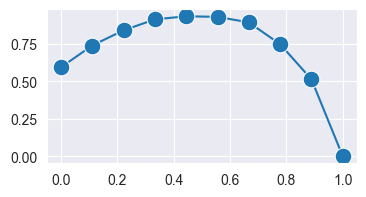

In [21]:
plt.figure(figsize=(4,2))
sns.lineplot(x=steps, y=scores, marker="o", markersize=12)